In [2]:
#1. lectura de datos 
datos <- read.csv("fci_students.csv",header=TRUE,sep=";",dec=",")
datos[1:10,]

#2. análisis exploratorio de datos:

dim(datos)
summary(datos)

student_id,start_year,start_year_mod,program_id,reprobadas_sem1,aprobadas_sem1,anuladas_sem1,cursadas_sem1,cursadas_sem3,gpa_sem1,Permanencia
00949132a43fb01342e71b82fd7e46,2018,0,1807,0,6,0,6,5,4.80,1
043d2f89c95055115a73b0b7095d24,2017,0,1740,6,0,0,6,0,1.00,1
053fcec6c777193754ab8313f7ed9f,2018,0,1807,0,8,0,8,5,5.05,1
098ca3cd792b1aeb880afad52f8005,2017,0,1736,1,9,0,10,4,4.36,0
098ddd38e641cb7a2d0003de9638d7,2017,0,1807,1,4,1,6,5,4.65,1
09fffde5d88320d2664aebc7219403,2018,0,1737,0,6,0,6,6,5.48,1
0a1c99873b1bf84931803cb077f129,2020,1,1708,0,4,1,5,4,5.87,1
0bb806ca96706e9790d92a9d27aa2f,2021,1,1807,0,11,0,11,10,5.35,1
0c4a55a4ed9914b153b4867301f993,2020,1,1807,0,11,0,11,10,5.58,0
0fe5ab4f3df38493e8cc71afe37e45,2017,0,1708,3,2,0,5,6,3.59,1


[1] 2028   11

                          student_id     start_year   start_year_mod  
 004d6a77c956dea2e94c18f8f3965d:   1   Min.   :2017   Min.   :0.0000  
 0050b3d80b41ade5455e8f87d47d9b:   1   1st Qu.:2017   1st Qu.:0.0000  
 008419d0eb1f05d4050a9754dc6043:   1   Median :2018   Median :0.0000  
 00949132a43fb01342e71b82fd7e46:   1   Mean   :2019   Mean   :0.4532  
 00a4082a181ca3ed3ece8f039c7d76:   1   3rd Qu.:2020   3rd Qu.:1.0000  
 00b766201f72e60666f22c02317a5d:   1   Max.   :2021   Max.   :1.0000  
 (Other)                       :2022                                  
   program_id   reprobadas_sem1  aprobadas_sem1   anuladas_sem1   
 Min.   :1704   Min.   : 0.000   Min.   : 0.000   Min.   :0.0000  
 1st Qu.:1708   1st Qu.: 0.000   1st Qu.: 3.000   1st Qu.:0.0000  
 Median :1737   Median : 1.000   Median : 5.000   Median :0.0000  
 Mean   :1751   Mean   : 1.401   Mean   : 4.903   Mean   :0.1272  
 3rd Qu.:1779   3rd Qu.: 2.000   3rd Qu.: 6.000   3rd Qu.:0.0000  
 Max.   :1822   Max.   :10.000

In [3]:
install.packages("corrplot")
library("corrplot")


  There is a binary version available but the source version is later:
         binary source needs_compilation
corrplot   0.88   0.92             FALSE



installing the source package 'corrplot'


corrplot 0.92 loaded



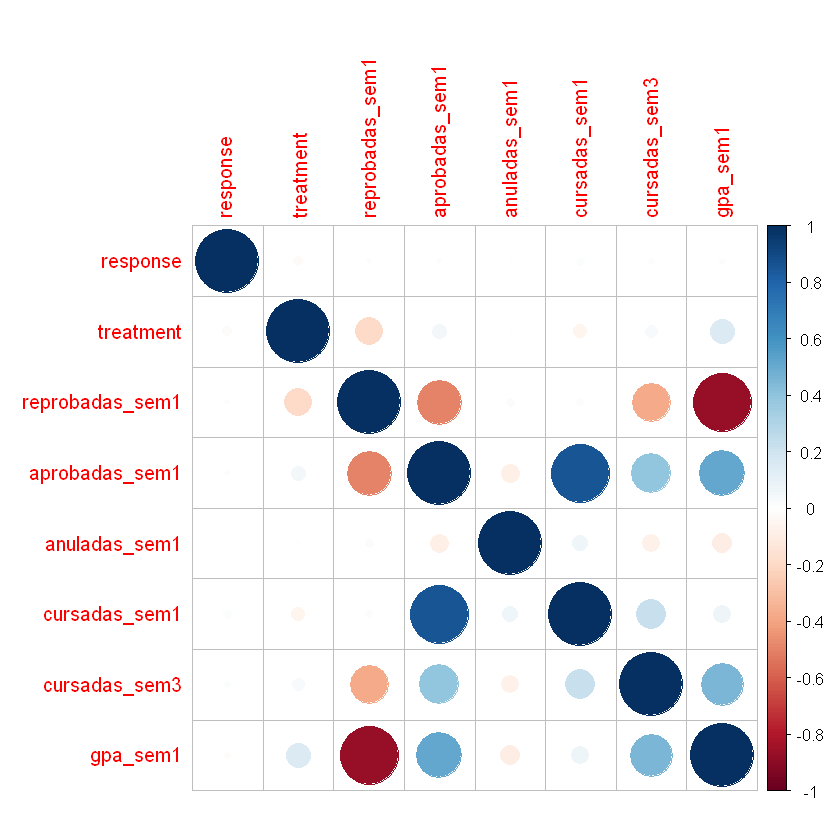

In [4]:
#definición de variables
response<-datos[,11]
treatment <- datos[,3]
confounders <- datos[,5:10]



dataT <- cbind(response,treatment,confounders)
corDatos <- cor(dataT)
corrplot(corDatos)

In [5]:
#análisis de independencia respuesta vs tratamiento
tab <- table(response, treatment)
print(tab)
chisq.test(cbind(as.factor(response),as.factor(treatment)))

        treatment
response   0   1
       0 185 171
       1 924 748


Warning message in chisq.test(cbind(as.factor(response), as.factor(treatment))):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  cbind(as.factor(response), as.factor(treatment))
X-squared = 283.33, df = 2027, p-value = 1


In [10]:
#Pasos a seguir (artículo BART)

#BART (Bayesian Additive Regression Trees) es un modelo estadístico que combina árboles de regresión aditiva con inferencia bayesiana.

#1) Preparación de datos-> OK excel

#2) Instalación de paquetes

#3) Desarrollo modelo:

    #Parámetros
    #Hiperparámetros 
        #Número de arboles-> relación entre las variables de entrada y la variable de salida
            #*Un mayor número de árboles puede aumentar la capacidad del modelo, pero también puede aumentar el tiempo de entrenamiento.
        #Profundidad de árboles-> profundidad máxima que pueden alcanzar los árboles en el modelo
            #*Una mayor profundidad permite un mayor ajuste a los datos
    #Distribuciones previas ->ayudan a controlar la complejidad del modelo y evitan el sobreajuste. (Media y Varianza)

#4) Ajustar modelo a datos (utilizar MCMC) -> algoritmo adecuado a parámetros del modelo
    #Este proceso de ajuste tiene objetivo de encontrar la distribución posterior de los parámetros

#5) Evaluar modelo -> métricas, precisión, incertidumbre de predicciones (intervalos de credibilidad o distrib)

#6) Interpretación de resultados

#7) Predicciones (con modelo BART ajustado)


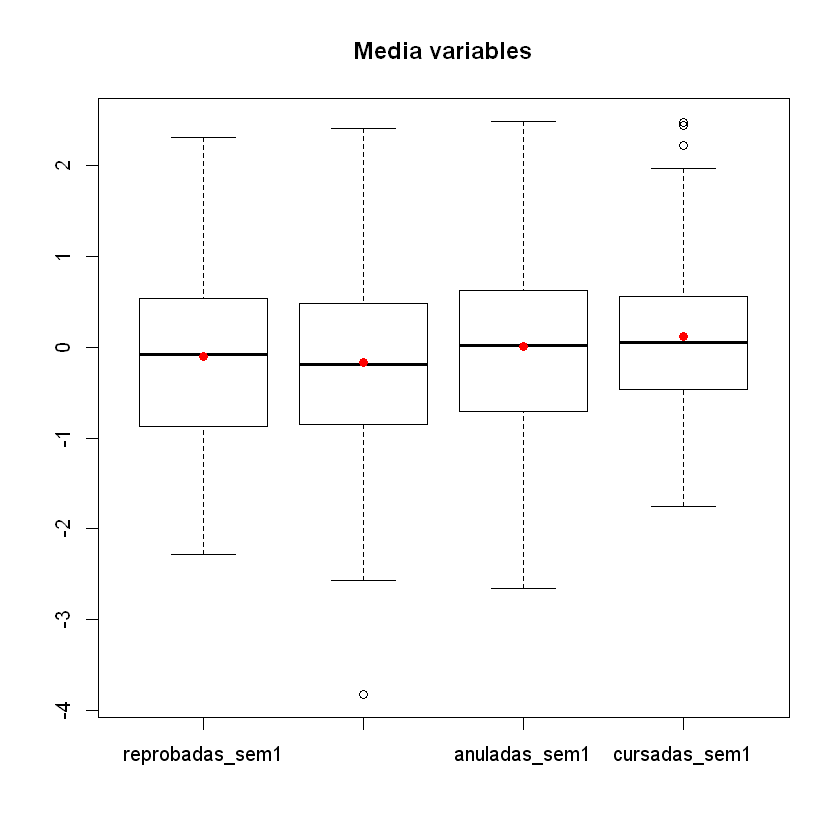

In [17]:
datos <- data.frame(
  reprobadas_sem1 = rnorm(100),
  aprobadas_sem1 = rnorm(100),
  anuladas_sem1 = rnorm(100),
    cursadas_sem1 = rnorm(100)
)

means <- colMeans(datos)

boxplot(datos)

points(x = 1:length(means), y = means, col = "red", pch = 19)

names <- c('reprobadas_sem1', 'aprobadas_sem1', 'anuladas_sem1', 'cursadas_sem1')
axis(1, at=1:4, labels=names)
title(main='Media variables')

In [18]:
install.packages("bartMachine")

also installing the dependencies 'rngtools', 'itertools', 'doRNG', 'rJava', 'bartMachineJARs', 'missForest'





  There are binary versions available but the source versions are later:
                binary  source needs_compilation
rngtools           1.5   1.5.2             FALSE
doRNG            1.8.2   1.8.6             FALSE
rJava            1.0-4   1.0-6              TRUE
bartMachineJARs    1.1   1.2.1             FALSE
missForest         1.4     1.5             FALSE
bartMachine      1.2.6 1.3.3.1             FALSE

  Binaries will be installed
package 'itertools' successfully unpacked and MD5 sums checked
package 'rJava' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Informatica\AppData\Local\Temp\Rtmp8yDmyp\downloaded_packages


installing the source packages 'rngtools', 'doRNG', 'bartMachineJARs', 'missForest', 'bartMachine'


Warning message in install.packages("bartMachine"):
"installation of package 'bartMachineJARs' had non-zero exit status"
Warning message in install.packages("bartMachine"):
"installation of package 'bartMachine' had non-zero exit status"


In [19]:
library(bartMachine)

ERROR: Error in library(bartMachine): there is no package called 'bartMachine'


In [23]:
#formula <- y ~ x1 + x2 + x3 + x4 + x5

In [24]:
y= as.factor(response)

summary(confounders)
x1 = confounders[,1]
x2 = confounders[,2]
x3 = confounders[,4]
x4 = confounders[,5]
x5 = confounders[,6]

formula <- y ~ x1 + x2 + x3 + x4 + x5

model <- bartMachine(formula, data = datos)

 reprobadas_sem1  aprobadas_sem1   anuladas_sem1    cursadas_sem1   
 Min.   : 0.000   Min.   : 0.000   Min.   :0.0000   Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.: 3.000   1st Qu.:0.0000   1st Qu.: 6.000  
 Median : 1.000   Median : 5.000   Median :0.0000   Median : 6.000  
 Mean   : 1.401   Mean   : 4.903   Mean   :0.1272   Mean   : 6.431  
 3rd Qu.: 2.000   3rd Qu.: 6.000   3rd Qu.:0.0000   3rd Qu.: 7.000  
 Max.   :10.000   Max.   :55.000   Max.   :6.0000   Max.   :56.000  
 cursadas_sem3       gpa_sem1    
 Min.   : 0.000   Min.   :0.000  
 1st Qu.: 3.000   1st Qu.:3.900  
 Median : 5.000   Median :4.650  
 Mean   : 4.272   Mean   :4.479  
 3rd Qu.: 6.000   3rd Qu.:5.220  
 Max.   :30.000   Max.   :6.680  

ERROR: Error in bartMachine(formula, data = datos): no se pudo encontrar la función "bartMachine"


In [26]:
model <- bartMachine(formula, data = datos, ntree = 100)

ERROR: Error in bartMachine(formula, data = datos, ntree = 100): no se pudo encontrar la función "bartMachine"


In [27]:
model <- bartMachine(formula, data = datos, ndpost = 5)

ERROR: Error in bartMachine(formula, data = datos, ndpost = 5): no se pudo encontrar la función "bartMachine"


In [30]:
install.packages("bartMachine")
library(bartMachine)

also installing the dependencies 'rngtools', 'itertools', 'doRNG', 'rJava', 'bartMachineJARs', 'missForest'





  There are binary versions available but the source versions are later:
                binary  source needs_compilation
rngtools           1.5   1.5.2             FALSE
doRNG            1.8.2   1.8.6             FALSE
rJava            1.0-4   1.0-6              TRUE
bartMachineJARs    1.1   1.2.1             FALSE
missForest         1.4     1.5             FALSE
bartMachine      1.2.6 1.3.3.1             FALSE

  Binaries will be installed
package 'itertools' successfully unpacked and MD5 sums checked
package 'rJava' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Informatica\AppData\Local\Temp\Rtmp8yDmyp\downloaded_packages


installing the source packages 'rngtools', 'doRNG', 'bartMachineJARs', 'missForest', 'bartMachine'


Warning message in install.packages("bartMachine"):
"installation of package 'bartMachineJARs' had non-zero exit status"
Warning message in install.packages("bartMachine"):
"installation of package 'bartMachine' had non-zero exit status"


ERROR: Error in library(bartMachine): there is no package called 'bartMachine'
